In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense ,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
from keras import Sequential

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_path = r"C:\Users\BIT\OneDrive\Desktop\Cats & Dogs\training_set\training_set"
test_path = r"C:\Users\BIT\OneDrive\Desktop\Cats & Dogs\test_set\test_set"


In [16]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256), # Resize images to 64x64
    batch_size=32,
    class_mode='binary'   # Binary classification (cats/dogs)
)

Found 8005 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 2023 images belonging to 2 classes.


In [22]:
for images, labels in training_set:
    print("Batch Shape (Images):", images.shape)
    print("Batch Shape (Labels):", labels.shape)
    break

Batch Shape (Images): (32, 256, 256, 3)
Batch Shape (Labels): (32,)


In [42]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

          

In [43]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 31, 31, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,049 (976.75 KB)

 Trainable params: 249,601 (975.00 KB)

 Non-trainable params: 448 (1.75 KB)

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
history=model.fit(training_set,epochs=10,validation_data=(test_set))

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 170s 663ms/step - accuracy: 0.6046 - loss: 0.7002 - val_accuracy: 0.4998 - val_loss: 1.0294
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 132s 524ms/step - accuracy: 0.7349 - loss: 0.5281 - val_accuracy: 0.6915 - val_loss: 0.5988
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 131s 520ms/step - accuracy: 0.7750 - loss: 0.4636 - val_accuracy: 0.5472 - val_loss: 0.8317
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 133s 531ms/step - accuracy: 0.8125 - loss: 0.3968 - val_accuracy: 0.7642 - val_loss: 0.5010
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 125s 498ms/step - accuracy: 0.8599 - loss: 0.3281 - val_accuracy: 0.7647 - val_loss: 0.5126
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 122s 487ms/step - accuracy: 0.8818 - loss: 0.2722 - val_accuracy: 0.7701 - val_loss: 0.5139
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 122s 486ms/step - accuracy: 0.9164 - loss: 0.2047 - val_accuracy: 0.6901 - val_loss: 0.7529
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 122s 484ms/step - accuracy: 0.9269 -

In [46]:
import matplotlib.pyplot as plt

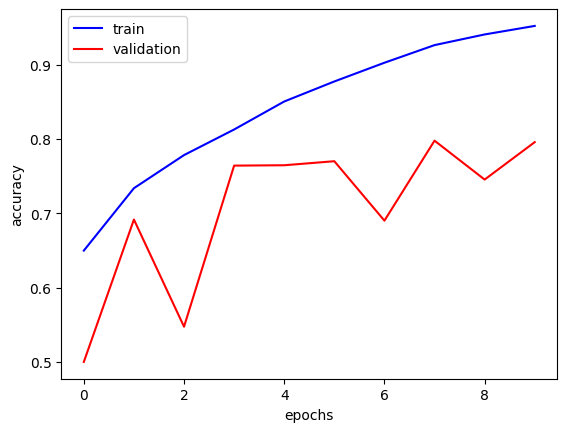

In [47]:
plt.plot(history.history['accuracy'],c='b',label='train')
plt.plot(history.history['val_accuracy'],c='r',label='validation')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

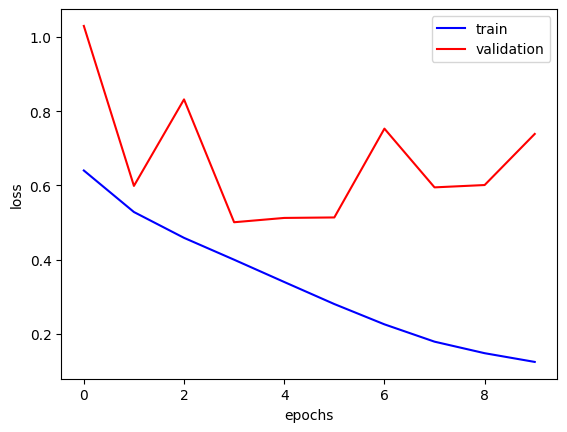

In [48]:
plt.plot(history.history['loss'],c='b',label='train')
plt.plot(history.history['val_loss'],c='r',label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [61]:
path='C:\\Users\\BIT\\OneDrive\\Desktop\\Cats & Dogs\\test_set\\test_set\\dogs\\dog.4015.jpg'

In [62]:
from tensorflow.keras.preprocessing import image
img_resz=image.load_img(path,target_size=(256,256))

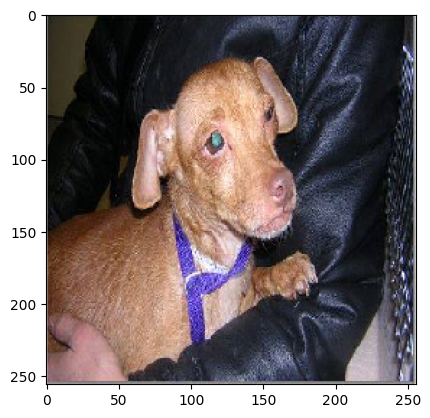

In [71]:
plt.imshow(img_resz)

In [63]:
img_ary=image.img_to_array(img_resz)
img_ary=img_ary/255

In [64]:
img_ary

array([[[0.8156863 , 0.8117647 , 0.79607844],
        [0.81960785, 0.8156863 , 0.79607844],
        [0.8352941 , 0.83137256, 0.8117647 ],
        ...,
        [0.7921569 , 0.7921569 , 0.8       ],
        [0.84313726, 0.84313726, 0.8509804 ],
        [0.8156863 , 0.8156863 , 0.8235294 ]],

       [[0.77254903, 0.76862746, 0.7529412 ],
        [0.12156863, 0.11764706, 0.09803922],
        [0.19607843, 0.19215687, 0.17254902],
        ...,
        [0.16078432, 0.16078432, 0.16862746],
        [0.54901963, 0.54901963, 0.5568628 ],
        [0.8627451 , 0.8627451 , 0.87058824]],

       [[0.76862746, 0.7647059 , 0.74509805],
        [0.25490198, 0.2509804 , 0.23137255],
        [0.10196079, 0.10196079, 0.07058824],
        ...,
        [0.1764706 , 0.1764706 , 0.18431373],
        [0.46666667, 0.46666667, 0.4745098 ],
        [0.78039217, 0.78039217, 0.7882353 ]],

       ...,

       [[0.8235294 , 0.7882353 , 0.80784315],
        [0.43137255, 0.3529412 , 0.3882353 ],
        [0.54509807, 0

In [65]:
image1=np.expand_dims(img_ary , axis=0)

In [66]:
prediction = model.predict(image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [67]:
prediction

array([[0.94076324]], dtype=float32)

In [68]:
if prediction>0.5:
    print("DOG")
else:
    print("CAT")

DOG
